## 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!
첫 번째 프로젝트에서는 우리가 오늘 많은 시간을 들여서 직접 실습해 보았던 모델 설계, 손실함수 정의와 기울기 계산을 구현해 보겠습니다.
새로운 데이터로 프로젝트를 진행하지만, 과정은 모두 동일합니다. 함께 진행했던 과정과 코드를 참고하여 충분히 고민한 후 진행해 보세요.

데이터는 sklearn.datasets에 있는 데이터 중 하나인 당뇨병 데이터를 사용하겠습니다.
데이터에 관한 정보를 다음 글에서 살펴보세요. 데이터에 대한 이해는 언제나 첫 번째로 해야하는 필수 과정입니다!

회귀 (3) - 당뇨병 환자 데이터(diabetes)와 다중 선형 회귀  https://yhyun225.tistory.com/11

다음 과정을 차례대로 진행해주세요!

### (1) 데이터 가져오기

In [36]:
# sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
from sklearn.datasets import load_diabetes

diabates = load_diabetes()

diabates.feature_names   

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [37]:
# diabetes의 data를 df_X에, target을 df_y에 저장해주세요.
df_X = diabates.data
df_y = diabates.target

print(df_X.shape)
print(df_y.shape)

(442, 10)
(442,)


### (2) 모델에 입력할 데이터 X 준비하기

In [38]:
# df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.
X = df_X

### (3) 모델에 예측할 데이터 y 준비하기
df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [39]:
y = df_y

### (4) train 데이터와 test 데이터로 분리하기

In [40]:
# X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(353, 10) (89, 10) (353,) (89,)


### (5) 모델 준비하기
입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
모델 함수를 구현해주세요.

In [41]:
import numpy as np
W = np.random.rand(10)
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [42]:
W

array([0.30569098, 0.55685921, 0.39688233, 0.14554101, 0.61418691,
       0.97218806, 0.83766354, 0.93453222, 0.9201397 , 0.13522433])

In [43]:
b

0.10634009474653172

### (6) 손실함수 loss 정의하기
손실함수를 MSE 함수로 정의해주세요.

In [44]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

### (7) 기울기를 구하는 gradient 함수 구현하기
기울기를 계산하는 gradient 함수를 구현해주세요.

In [45]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [-1.37044351 -0.31093244 -4.28925476 -3.22790592 -1.54057345 -1.26334975
  2.88834395 -3.14261858 -4.13522853 -2.79455933]
db: -304.0542881362988


### (8) 하이퍼 파라미터인 학습률 설정하기
학습률, learning rate 를 설정해주세요
만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [46]:
LEARNING_RATE = 0.3

### (9) 모델 학습하기
정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

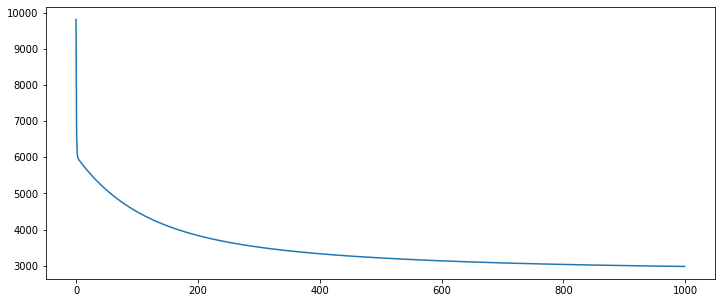

In [47]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
#     if i % 10 == 0:
#         print('Iteration %d : Loss %0.4f' % (i, L))
        
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(losses)
plt.show()

### (10) test 데이터에 대한 성능 확인하기
test 데이터에 대한 성능을 확인해주세요.

In [48]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2870.1745186946896

### (11) 정답 데이터와 예측한 데이터 시각화하기
x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

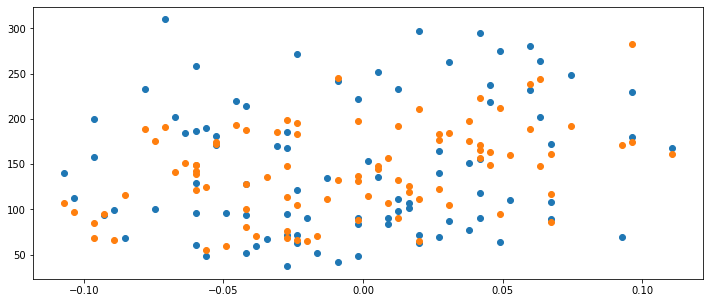

In [49]:
plt.figure(figsize=(12,5))
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

## 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?
자.. 드디어 오늘의 마지막 프로젝트입니다! 오늘 노드의 제목이기도 한 프로젝트네요 ㅎㅎ
마지막 프로젝트로는 보다 실용적인 데이터셋을 활용할 예정입니다. 바로 그 유명한 캐글(Kaggle) 경진대회에서 제공하는 데이터셋인데요!

데이터셋의 주제는 시간, 온도, 습도, 계절 등의 정보가 담긴 데이터를 통해 자전거의 대여량을 예측하는 문제입니다.
자전거 대여량을 결정하는 데에는 시간도 중요할 것이고, 요일이나 계절도 크게 영향을 미칠 것 같습니다.

이번 프로젝트에서는 직접 손실함수와 기울기를 계산하지 않고, 사이킷런(sklearn)의 LinearRegression 모델을 활용할 것입니다.
이 또한 위에서 진행해봤던 순서 그대로 진행하시면 됩니다!

단계는 다음과 같이 정리가 되어 있습니다. 그러면 오늘의 마지막 프로젝트, 시작해 볼까요!!! 💪🏼

### (1) 데이터 가져오기
터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.
여기에서 데이터를 상세히 확인할 수 있습니다.  https://www.kaggle.com/c/bike-sharing-demand/data

In [50]:
import pandas as pd

train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
to_datetime 활용 : 링크 참조   https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas.to_datetime
pandas datetime extract year month day 키워드로 검색해 보기

In [51]:
train['datetime'] = pd.to_datetime(train['datetime'])

train['year'] = train['datetime'].dt.year # 연도 정보
train['month'] = train['datetime'].dt.month # 월 정보
train['day'] = train['datetime'].dt.day # 일 정보
train['hour'] = train['datetime'].dt.hour # 시간 정보
train['minute'] = train['datetime'].dt.minute # 분 정보
train['second'] = train['datetime'].dt.second # 초 정보

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


### (3) year, month, day, hour, minute, second 데이터 개수 시각화하기
sns.countplot 활용해서 시각화하기
subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

<AxesSubplot:xlabel='second', ylabel='count'>

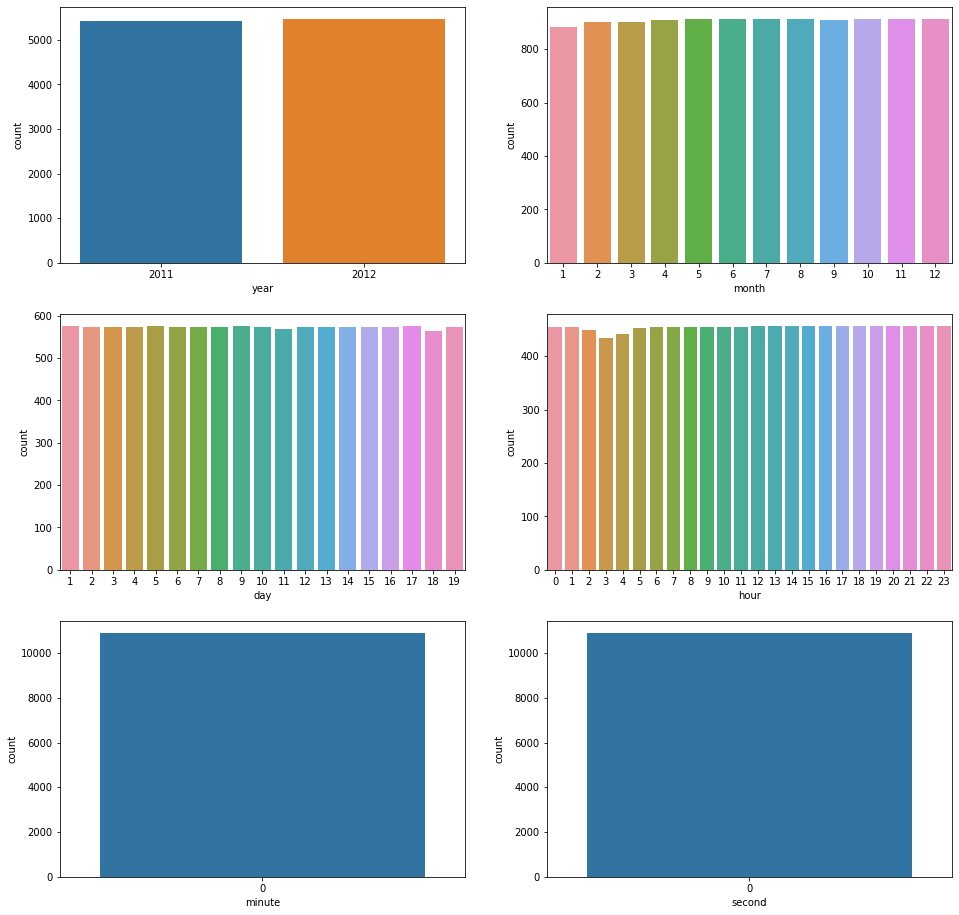

In [52]:
import seaborn as sns

plt.figure(figsize=(16,16))

plt.subplot(3, 2, 1)
sns.countplot(x='year', data=train)

plt.subplot(3, 2, 2)
sns.countplot(x='month', data=train)

plt.subplot(3, 2, 3)
sns.countplot(x='day', data=train)

plt.subplot(3, 2, 4)
sns.countplot(x='hour', data=train)

plt.subplot(3, 2, 5)
sns.countplot(x='minute', data=train)

plt.subplot(3, 2, 6)
sns.countplot(x='second', data=train)

### (4) X, y 컬럼 선택 및 train/test 데이터 분리
X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. 
ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?
count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

In [53]:
X = train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour']].values
y = train['count'].values

print(X)
print(y)

[[ 1.  0.  0. ...  1.  1.  0.]
 [ 1.  0.  0. ...  1.  1.  1.]
 [ 1.  0.  0. ...  1.  1.  2.]
 ...
 [ 4.  0.  1. ... 12. 19. 21.]
 [ 4.  0.  1. ... 12. 19. 22.]
 [ 4.  0.  1. ... 12. 19. 23.]]
[ 16  40  32 ... 168 129  88]


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(8708, 12) (2178, 12)
(8708,) (2178,)


### (5) LinearRegression 모델 학습
sklearn의 LinearRegression 모델 불러오기 및 학습하기

In [55]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

### (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
학습된 모델에 X_test를 입력해서 예측값 출력하기
모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
mse 값과 함께 rmse 값도 계산하기

In [56]:
predictions = model.predict(X_test)
predictions

array([248.10627003,  48.79765547, 200.90676727, ..., 309.7528022 ,
        38.17030198, 243.62697388])

In [57]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

19945.37005375412

In [58]:
rmse = mean_squared_error(y_test, predictions)**0.5
rmse

141.22807813517156

### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

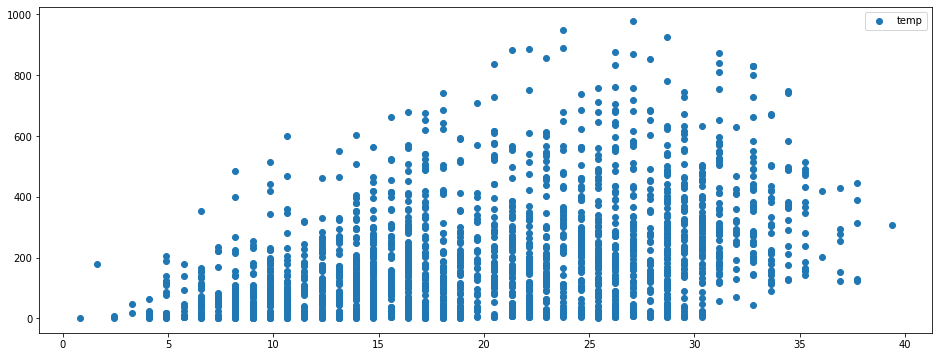

In [59]:
plt.figure(figsize=(16,6))

plt.scatter(X_test[:, 4], y_test, label="temp")
plt.legend()
plt.show()

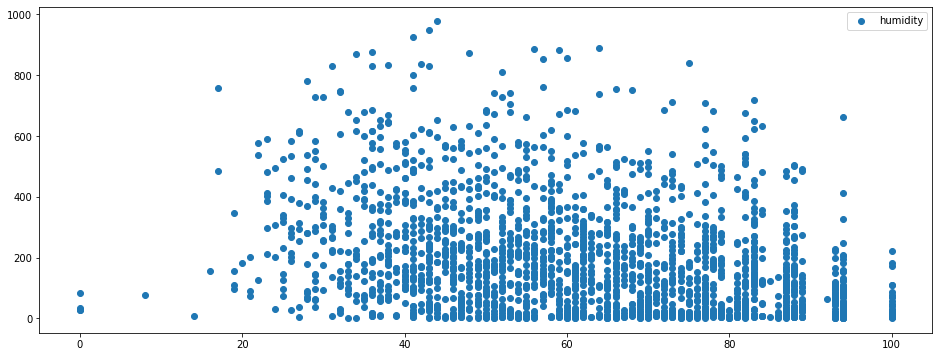

In [60]:
plt.figure(figsize=(16,6))

plt.scatter(X_test[:, 6], y_test, label="humidity")
plt.legend()
plt.show()

## 회고
1. 모델을 만들어 보는 과정을 해봐서 좋은 경험이었다.
2. 아직도 따라하기 수준이라 아쉽다.
3. 좀 더 다양한 데이터로 훈련을 해야겠다.